In [24]:
import pandas as pd
import numpy as np
import sys
import statsmodels.api as sm
import statsmodels.formula.api as smf
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60)

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

pd.options.mode.chained_assignment = None  # default='warn'

my_dpi=72

print('This is loaded')

This is loaded


In [2]:
#base = pd.read_csv('rc15csv/pai2015before.csv', thousands=",", index_col='schid')
base = pd.read_csv('rc15csv/tim2015data.csv', thousands=",", index_col='schid')
base.shape

(4094, 54)

In [3]:
elemval = ['CHARTER NET','CHARTER NET SCH','CHARTER HIGH SCH+','CHARTER NET HIGH SCH+','HIGH SCHOOL+']
elembase = base[~base.schooltype.isin(elemval)]
elembase.shape

(3997, 54)

In [4]:
elembase.head(3)

,schid15,value,distid,districtname,county,schooltype,lowinc2014,me2014schoolisat,me2014districtisat,me2014stateisat,...,lowinc2015,act2015school,actscore2015district,actscore2015state,zelemscore2015,avgelem2015,stdvelem2015,zhsscore2015,avghs2015,stdvhs2015
schid,,,,,,,,,,,,,,,,,,,,,
030110040261001,030110040261001,"Edinburg Jr High School, Edinburg",030110040260000,Edinburg CUSD 4,Christian,MIDDLE SCHL,9.4,NaN,41.9,58.7,...,50.0,NaN,16.9,20.5,-1.14,29.8,9.61,NaN,NaN,NaN
56099207U262005,56099207U262005,"Peotone Intermediate Center, Frankfort",56099207U260000,Peotone CUSD 207U,Will,ELEMENTARY,5.2,65.1,66.9,58.7,...,25.1,NaN,21.0,20.5,-1.51,48.6,12.72,NaN,NaN,NaN
340490560022003,340490560022003,"River Trail School, Gurnee",340490560020000,Gurnee SD 56,Lake,ELEMENTARY,9.9,67.6,53.8,58.7,...,16.7,NaN,NaN,20.5,-0.63,53.4,12.40,NaN,NaN,NaN


In [5]:
elemval = ['']
elembase = elembase[~elembase.zelemscore2015.isin(elemval)]
#elembase.dtypes

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     5135.
Date:                Tue, 15 Dec 2015   Prob (F-statistic):               0.00
Time:                        14:14:14   Log-Likelihood:                -10994.
No. Observations:                2906   AIC:                         2.199e+04
Df Residuals:                    2904   BIC:                         2.200e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     59.6636      0.428    139.507      0.000        58.825    60.502
x             -0.4881      0.007    -71.658      0.000        -0.501    -0.475
==============================================================================
Omnibus:                      181.721   Durbin-Watson:                   1.668
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              313.676
Skew:                           0.476   Prob(JB):                     7.69e-69
Kurtosis:                       4.297   Cond. No.                         136.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

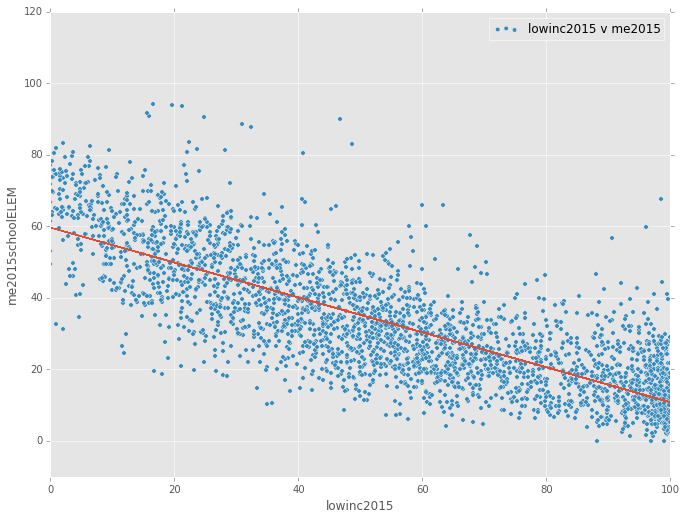

In [25]:
x = elembase['lowinc2015']
y = elembase['me2015schoolELEM']

# that's a tilde
lm = smf.ols(formula='y ~ x', data=elembase).fit()

elembase.plot(kind='scatter', x='lowinc2015', y='me2015schoolELEM',label="lowinc2015 v me2015", figsize=(800/my_dpi, 600/my_dpi))
plt.ylim(-10, 120)
plt.xlim(0, 100)
plt.legend()

# plots the trendline

plt.plot(x, lm.params.x*x + lm.params.Intercept, '-')

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                 1.282e+04
Date:                Tue, 15 Dec 2015   Prob (F-statistic):               0.00
Time:                        14:13:07   Log-Likelihood:                -9554.8
No. Observations:                2780   AIC:                         1.911e+04
Df Residuals:                    2778   BIC:                         1.913e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    -21.0559      0.495    -42.505      0.000       -22.027   -20.085
x              0.9248      0.008    113.211      0.000         0.909     0.941
==============================================================================
Omnibus:                       30.197   Durbin-Watson:                   1.710
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.698
Skew:                          -0.083   Prob(JB):                     7.24e-11
Kurtosis:                       3.613   Cond. No.                         211.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

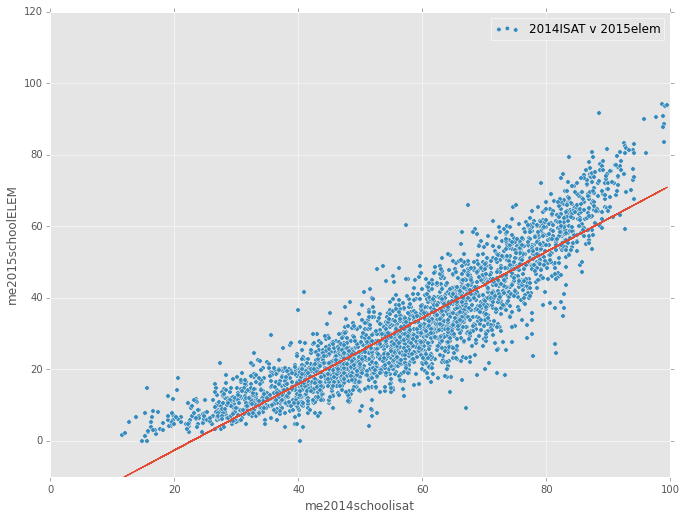

In [23]:

# different way, assign x and y

x = elembase['me2014schoolisat']
y = elembase['me2015schoolELEM']

# that's a tilde
lm = smf.ols(formula='y ~ x', data=elembase).fit()

elembase.plot(kind='scatter', x='me2014schoolisat', y='me2015schoolELEM',label="2014ISAT v 2015elem", figsize=(800/my_dpi, 600/my_dpi))

plt.ylim(-10, 120)
plt.xlim(0, 100)
plt.legend()

# plots the trendline

plt.plot(x, lm.params.x*x + lm.params.Intercept, '-')
lm.summary()

In [8]:
#hsval = ['CHARTER HIGH SCH+','CHARTER NET HIGH SCH+','HIGH SCHOOL+']
#hsbase1 = base[~base.schooltype.isin(hsval)]
hsvalempty = ['','NaN']
#hsbase = base[~base.me2015schoolHS.isin(hsvalempty)]
base['me2015schoolHS'].fillna('--')
#hsbase = base['me2015schoolHS'].notnull()
base.head(3)

,schid15,value,distid,districtname,county,schooltype,lowinc2014,me2014schoolisat,me2014districtisat,me2014stateisat,...,lowinc2015,act2015school,actscore2015district,actscore2015state,zelemscore2015,avgelem2015,stdvelem2015,zhsscore2015,avghs2015,stdvhs2015
schid,,,,,,,,,,,,,,,,,,,,,
030110040261001,030110040261001,"Edinburg Jr High School, Edinburg",030110040260000,Edinburg CUSD 4,Christian,MIDDLE SCHL,9.4,NaN,41.9,58.7,...,50.0,NaN,16.9,20.5,-1.14,29.8,9.61,NaN,NaN,NaN
56099207U262005,56099207U262005,"Peotone Intermediate Center, Frankfort",56099207U260000,Peotone CUSD 207U,Will,ELEMENTARY,5.2,65.1,66.9,58.7,...,25.1,NaN,21.0,20.5,-1.51,48.6,12.72,NaN,NaN,NaN
340490560022003,340490560022003,"River Trail School, Gurnee",340490560020000,Gurnee SD 56,Lake,ELEMENTARY,9.9,67.6,53.8,58.7,...,16.7,NaN,NaN,20.5,-0.63,53.4,12.40,NaN,NaN,NaN


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.362
Model:                            OLS   Adj. R-squared:                  0.361
Method:                 Least Squares   F-statistic:                     370.0
Date:                Tue, 15 Dec 2015   Prob (F-statistic):           1.25e-65
Time:                        14:14:29   Log-Likelihood:                -2586.8
No. Observations:                 653   AIC:                             5178.
Df Residuals:                     651   BIC:                             5187.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     44.2579      1.097     40.338      0.000        42.103    46.412
x             -0.3829      0.020    -19.235      0.000        -0.422    -0.344
==============================================================================
Omnibus:                      126.523   Durbin-Watson:                   1.937
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              318.651
Skew:                           0.994   Prob(JB):                     6.39e-70
Kurtosis:                       5.786   Cond. No.                         121.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

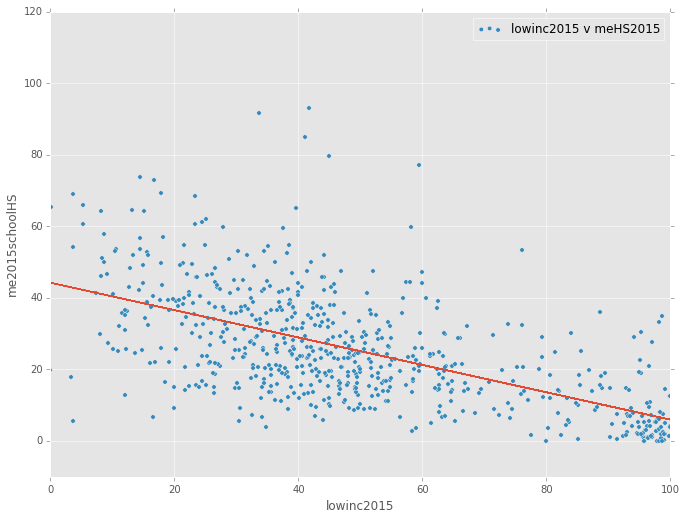

In [26]:
x = base['lowinc2015']
y = base['me2015schoolHS']

# that's a tilde
lm = smf.ols(formula='y ~ x', data=base).fit()

base.plot(kind='scatter', x='lowinc2015', y='me2015schoolHS',label="lowinc2015 v meHS2015", figsize=(800/my_dpi, 600/my_dpi))
plt.ylim(-10, 120)
plt.xlim(0, 100)
plt.legend()

# plots the trendline

plt.plot(x, lm.params.x*x + lm.params.Intercept, '-')

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.513
Method:                 Least Squares   F-statistic:                     681.4
Date:                Tue, 15 Dec 2015   Prob (F-statistic):          4.61e-103
Time:                        14:14:40   Log-Likelihood:                -2474.1
No. Observations:                 647   AIC:                             4952.
Df Residuals:                     645   BIC:                             4961.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -5.5820      1.265     -4.413      0.000        -8.066    -3.098
x              0.6149      0.024     26.103      0.000         0.569     0.661
==============================================================================
Omnibus:                       17.060   Durbin-Watson:                   1.887
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.221
Skew:                           0.245   Prob(JB):                     5.50e-06
Kurtosis:                       3.812   Cond. No.                         156.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

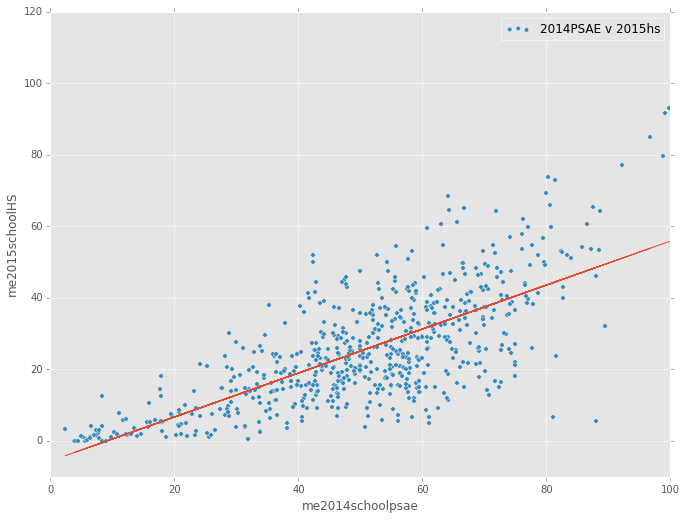

In [27]:
# different way, assign x and y

x = base['me2014schoolpsae']
y = base['me2015schoolHS']

# that's a tilde
lm = smf.ols(formula='y ~ x', data=base).fit()

base.plot(kind='scatter', x='me2014schoolpsae', y='me2015schoolHS',label="2014PSAE v 2015hs", figsize=(800/my_dpi, 600/my_dpi))
plt.ylim(-10, 120)
plt.xlim(0, 100)
plt.legend()

# plots the trendline

plt.plot(x, lm.params.x*x + lm.params.Intercept, '-')

lm.summary()